In [ ]:
import sys
!{sys.executable} -m pip install python-docx

Aprila 2019 je bil sprejet zakon o odjavljenih vozilih. Ali se je kaj spremenilo?

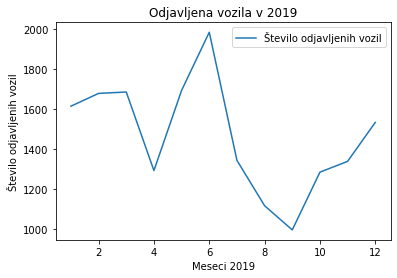

{'osebni avtomobil': 14047, 'traktor': 365, 'tovorno vozilo': 2883, 'motorno kolo': 49, 'vleèno vozilo': 59, 'priklopno vozilo': 39, 'delovno vozilo': 2, 'motorno kolo enduro': 1, 'trikolo': 4, 'moped-dvokolo': 3, 'motorno kolo z visoko moèjo': 15, 'štirikolo': 1, 'trikolesnik': 35, 'štirikolo za vse terene': 2, 'motorno kolo s srednjo moèjo': 38, 'motorno kolo z nizko moèjo': 26, 'dvokolesni moped': 8, 'lahko štirikolo': 1, 'traktorski priklopnik': 1}


In [12]:
from csv import DictReader
import operator
import matplotlib.pyplot as plt

meseci = dict()
tip_vozila = dict()

for i in range(1,13):
    file = 'podatki/Podatki_{:02d}'.format(i) + str(2019) + '.csv'
    podatki = DictReader(open(file, 'rt', encoding='ANSI'), delimiter=';')

    if i not in meseci:
        meseci[i] = 0

    for row in podatki:
        status = str(row['Status vozila (opis)'])
        if status == 'odjavljeno':
            meseci[i] += 1
            tip = str(row['J-Kategorija in vrsta vozila (opis)'])
            if tip not in tip_vozila:
                tip_vozila[tip] = 0
            tip_vozila[tip] += 1

meseci1 = list(meseci.keys())
st_odjavljenih_vozil = list(meseci.values())

plt.plot(meseci1, st_odjavljenih_vozil, label='Število odjavljenih vozil')
plt.title('Odjavljena vozila v 2019')
plt.xlabel('Meseci 2019')
plt.ylabel('Število odjavljenih vozil')
plt.legend()
plt.show()

print(tip_vozila)

In [51]:
from docx import Document
from datetime import datetime

bencinDoc = Document('podatki/Neosvincen-motorn-bencin-95-oktanski.docx')
dizelDoc = Document('podatki/Dizelsko-gorivo.docx')

bencin = dict()
dizel = dict()

for table in bencinDoc.tables:
    for row in table.rows[1:]:
        cena_goriva = float(row.cells[7].text.replace(',','.'))
        datum = datetime.strptime(row.cells[0].text, '%d.%m.%Y')
        if datum.year <= 2019 and datum.year >= 2015:
            bencin[datum] = cena_goriva
        if datum.year < 2015:
            break

for table in dizelDoc.tables:
    for row in table.rows[1:]:
        cena_goriva = float(row.cells[7].text.replace(',','.'))
        datum = datetime.strptime(row.cells[0].text, '%d.%m.%Y')
        if datum.year <= 2019 and datum.year >= 2015:
            dizel[datum] = cena_goriva
        if datum.year < 2015:
            break


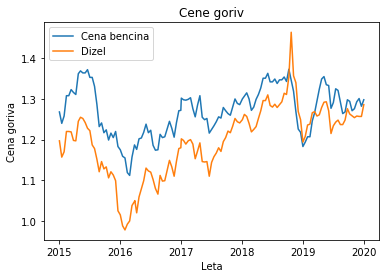

In [55]:
plt.plot(list(bencin.keys()), list(bencin.values()), label='Cena bencina')
plt.plot(list(dizel.keys()), list(dizel.values()), label='Dizel')
plt.title('Cene goriv')
plt.xlabel('Leta')
plt.ylabel('Cena goriva')
plt.legend()
plt.show()
